In [22]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 32

In [23]:
# Let's load in some functions we created last class

# Convert data to standard units
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x)  


# we can create a function to calculate the correlation coefficient
def correlation(t, label_x, label_y):
    x_in_standard_units = standard_units(t.column(label_x))
    y_in_standard_units = standard_units(t.column(label_y))
    return np.sum(x_in_standard_units * y_in_standard_units)/(t.num_rows - 1)


# function to calculate the slope 
def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd


# function to calculate the intercept
def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

## Regression Line 

In [24]:
# Helper function: Draw a line for a given slope, intercept, and possibly input location x
def draw_line(slope=0, intercept=0, x=None, color='r'):
    if x is None:
        x1, x2, y1, y2 = plots.gca().axis()
    x = make_array(x1, x2)
    y = x*slope + intercept
    plots.plot(x, y, color=color)
    
    
# Helper function: Produces a plot we will use for a dataset in this demo to visualize errors
def show_demographics_errors(slope, intercept, add_RMSE = False):
    
    # plot the demographics data and a few residuals on the plot
    sample = [[14.7, 33995], [19.1, 61454], [50.7, 71183], [59.5, 105918]]
    demographics.scatter('College%', 'Median Income', alpha=0.5)
    xlims = make_array(5, 75)
    plots.plot(xlims, slope * xlims + intercept, lw=4)
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=4)
    
    # get and print the RMSE
    if add_RMSE:
        x = demographics.column('College%')
        y = demographics.column('Median Income')
        y_predicted = slope*x + intercept
        rmse = np.sqrt(np.mean( (y - y_predicted)**2))  
        plots.title("RMSE: " + str(round(rmse, 2)))

In [25]:
# load demographic data 
demographics = Table.read_table('district_demographics2016.csv')
demographics.show(5)

State,District,Median Income,Percent voting for Clinton,College%
Alabama,"Congressional District 1 (115th Congress), Alabama",47083,34.1,24
Alabama,"Congressional District 2 (115th Congress), Alabama",42035,33,21.8
Alabama,"Congressional District 3 (115th Congress), Alabama",46544,32.3,22.8
Alabama,"Congressional District 4 (115th Congress), Alabama",41110,17.4,17
Alabama,"Congressional District 5 (115th Congress), Alabama",51690,31.3,30.3


In [26]:
# select only the 'College%', 'Median Income' columns



In [27]:
# Calculate the correlation


In [28]:
# visualize the data


In [29]:
# Calculate the slope and intercept




In [30]:
# create a function that estimates all the predictions (fitted values)
def fitted_values(t, x, y):
    """Return an array of the regressions estimates at all the x values"""
    ...

    

In [31]:
# Predicted median incomes (y-hat values)


In [32]:
# Plot the linear predictions




## Residuals

In [33]:
# Try any slope, any intercept


In [34]:
# Try any slope, any intercept


In [35]:
# Visualize errors for estimated line


In [36]:
# Get all the residuals between the actual observations and the predicted values for the demographics data




## Root Mean Square Error

In [37]:
# Calculate the root mean squared error (RMSE) for the actual residuals



In [38]:
# function to calculate the RMSE for any splot and intercept for the demographic data
def demographics_rmse(any_slope, any_intercept):
    ...

    
    
    

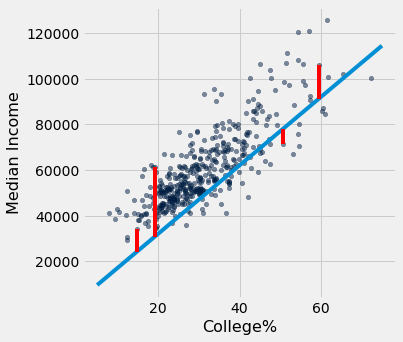

In [39]:
# show the demographic plot and the RMSE for an arbitrary slope and intercept

example_slope = 1500          #  -1000     500
example_intercept = 2000      #  75000     20000

demographics_rmse(example_slope, example_intercept)
show_demographics_errors(example_slope, example_intercept)

In [40]:
# The demographic plot and the RMSE for the slope and intercept (based on correlation formula) 



## Numerical Optimization

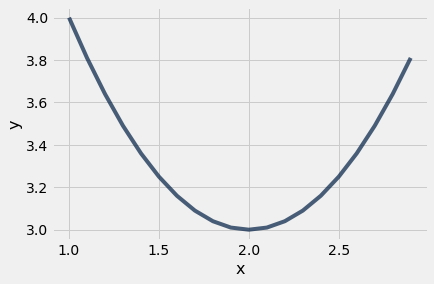

In [41]:
# An arbitrary function 
def f(x):
    return ((x-2)**2) + 3

# plot the function
x = np.arange(1, 3, 0.1)
y = f(x)
Table().with_columns('x', x, 'y', y).plot('x')

In [42]:
# find the minimum value of the function 


### Minimizing RMSE ###

In [43]:
# RMSE for arbitrary slope and intercept


In [44]:
# RMSE for another arbitrary slope and intercept


In [45]:
# Minimize the demographic RMSE


In [46]:
# Our regression slope and intercept estimates from earlier (based on correlation formula)


In [47]:
# The minimum RMSE value


## Regression diagnostic plots

In [48]:
### Galton data

In [49]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

In [50]:
def residuals(t, x, y):
    ...

    

In [51]:
# add the fitted values and residuals to the height data





In [52]:
def plot_residuals(t, x, y):
    ...

    
    

### US women heights and average weights

In [53]:
# Height and average weight of US women
us_women = Table.read_table('us_women.csv')
us_women.show(5)

height,ave weight
58,115
59,117
60,120
61,123
62,126


In [54]:
# get the correlation between height and ave weight


In [55]:
# plot the residuals


## Polynomial regression

**Quadratic Function**

$$
f(x) ~=~ ax^2 + bx + c
$$
for constants $a$, $b$, and $c$.

In [56]:
def us_women_quadratic_rmse(a, b, c):
    ...

In [57]:
# get the quadratic fit coefficients



Can you fill in the coefficients in the prediction equation? 

$$
f(x) ~=~ ax^2 + bx + c
$$

In [58]:
# What is the predicted average weight for someone who is 65 inches?


In [59]:
# calculate the fitted values for quadratic



In [60]:
# plot the fitted values for the quadratic predictions


In [61]:
# calculate the residuals


In [62]:
# plot the residuals


In [63]:
# Are higher order terms needed???
# Try a degree 5 polynomial at home!







